## Načtení dat

In [5]:
import pandas as pd
import glob

In [24]:
soubory = glob.glob("*.csv")
soubory

['zdrojova-data-1.csv', 'zdrojova-data-2.csv']

In [26]:
seznam = []

for soubor in soubory:
    docasne = pd.read_csv(soubor)
    seznam.append(docasne)
    
df = pd.concat(seznam, axis="index")
df.shape

(2919, 81)

In [20]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0


## NaN hodnoty

In [21]:
df.isna().sum()

Id                  0
MSSubClass          0
MSZoning            4
LotFrontage       486
LotArea             0
                 ... 
MoSold              0
YrSold              0
SaleType            1
SaleCondition       0
SalePrice        1459
Length: 81, dtype: int64

In [51]:
nan_hodnoty = df.isna().sum()
nan_analyza = nan_hodnoty.loc[nan_hodnoty>0].sort_values(ascending=False).to_frame(name="pocet_nan")
nan_analyza["procento_nan"] = (nan_analyza["pocet_nan"]/len(df.index))*100
nan_analyza

,pocet_nan,procento_nan
PoolQC,2909,99.657417
MiscFeature,2814,96.402878
Alley,2721,93.216855
Fence,2348,80.438506
SalePrice,1459,49.982871
FireplaceQu,1420,48.646797
LotFrontage,486,16.649538
GarageCond,159,5.447071
GarageYrBlt,159,5.447071
GarageFinish,159,5.447071


## Analýza sloupce

In [69]:
# Kolik sloupec SalePrice obsahuje NaN hodnot?

df["SalePrice"].isna().sum()

1459

In [74]:
# Odstranění řádků s NaN hodnotami

df = df.loc[df["SalePrice"].notna()]
df.shape

(1460, 81)

<AxesSubplot:>

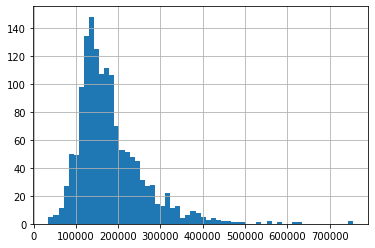

In [80]:
# Graf sloupce

df["SalePrice"].hist(bins = 60)

In [88]:
# Korelační analýza

df.corr(method="pearson")["SalePrice"].sort_values()

KitchenAbvGr    -0.135907
EnclosedPorch   -0.128578
MSSubClass      -0.084284
OverallCond     -0.077856
YrSold          -0.028923
LowQualFinSF    -0.025606
Id              -0.021917
MiscVal         -0.021190
BsmtHalfBath    -0.016844
BsmtFinSF2      -0.011378
3SsnPorch        0.044584
MoSold           0.046432
PoolArea         0.092404
ScreenPorch      0.111447
BedroomAbvGr     0.168213
BsmtUnfSF        0.214479
BsmtFullBath     0.227122
LotArea          0.263843
HalfBath         0.284108
OpenPorchSF      0.315856
2ndFlrSF         0.319334
WoodDeckSF       0.324413
LotFrontage      0.351799
BsmtFinSF1       0.386420
Fireplaces       0.466929
MasVnrArea       0.477493
GarageYrBlt      0.486362
YearRemodAdd     0.507101
YearBuilt        0.522897
TotRmsAbvGrd     0.533723
FullBath         0.560664
1stFlrSF         0.605852
TotalBsmtSF      0.613581
GarageArea       0.623431
GarageCars       0.640409
GrLivArea        0.708624
OverallQual      0.790982
SalePrice        1.000000
Name: SalePr

<AxesSubplot:title={'center':'SalePrice'}, xlabel='CentralAir'>

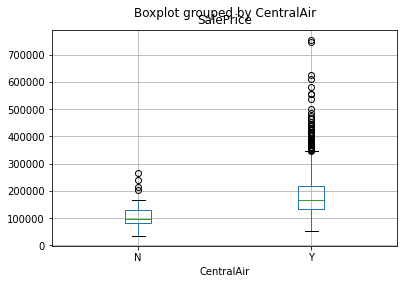

In [101]:
# Analýza odlehlých hodnot

df.boxplot(column="SalePrice", by="CentralAir")

In [108]:
# Filtrace

filtrace = (df["SalePrice"] > 600_000) & (df["CentralAir"] == "Y")
df.loc[filtrace]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
691,692,60,RL,104.0,21535,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2007,WD,Normal,755000.0
898,899,20,RL,100.0,12919,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,3,2010,New,Partial,611657.0
1169,1170,60,RL,118.0,35760,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2006,WD,Normal,625000.0
1182,1183,60,RL,160.0,15623,Pave,NaN,IR1,Lvl,AllPub,...,555,Ex,MnPrv,NaN,0,7,2007,WD,Abnorml,745000.0


In [113]:
# Třídění

df.groupby("MSZoning").mean()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
MSZoning,,,,,,,,,,,,,,,,,,,,,
C (all),605.200000,56.000000,69.700000,9501.300000,3.900000,4.600000,1924.100000,1958.200000,0.000000,222.800000,...,9.800000,64.400000,82.500000,0.000000,9.900000,0.000000,61.400000,7.700000,2008.300000,74528.000000
FV,707.030769,90.461538,59.491228,6638.861538,7.200000,5.030769,2004.507692,2004.830769,140.806452,327.892308,...,57.276923,103.476923,0.000000,0.000000,3.046154,0.000000,0.000000,6.276923,2007.846154,214014.061538
RH,860.437500,80.312500,58.923077,7380.062500,5.250000,5.562500,1945.687500,1971.937500,57.812500,312.750000,...,67.625000,28.250000,58.687500,0.000000,0.000000,0.000000,0.000000,7.500000,2007.500000,131558.375000
RL,737.277150,49.374457,74.680043,11571.814075,6.190269,5.535187,1975.461338,1985.659427,112.260908,492.514335,...,105.133797,45.141616,16.892268,4.192007,16.841877,3.499566,47.749783,6.317116,2007.824500,191004.994787
RM,697.926606,84.931193,52.366834,6379.775229,5.454128,5.995413,1943.256881,1976.894495,56.169725,239.839450,...,53.600917,38.275229,49.752294,0.701835,10.582569,0.000000,36.330275,6.211009,2007.761468,126316.830275
